In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [4]:
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [5]:
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,56.848021,19.807340,8.818343,16.344672,21.132525
1,46.791496,2.451654,9.703534,7.807378,22.039610
2,55.787977,6.115698,9.573036,2.864679,20.601538
3,55.493177,18.605206,9.061615,15.753327,24.888838
4,54.945597,2.995047,12.608045,15.596392,18.156924


<Axes: ylabel='Density'>

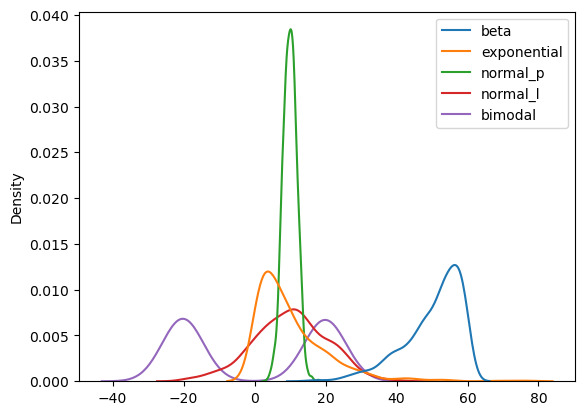

In [6]:
sns.kdeplot(data=df)


In [7]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.295210,10.394726,9.960147,10.152949,-0.162583
std,8.188331,10.224512,1.951491,10.348842,20.260031
min,15.309222,0.013657,3.666828,-19.686113,-27.796435
25%,46.188041,3.159157,8.625966,3.387477,-20.127159
50%,52.446446,7.422018,10.012323,10.478995,0.680126
75%,56.657270,14.743922,11.256139,17.038477,19.805530
max,59.997381,76.272347,17.941653,41.305625,28.233179


<Axes: ylabel='Density'>

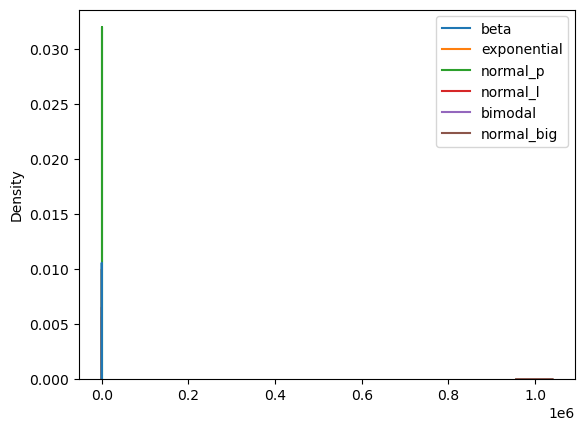

In [8]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<Axes: >

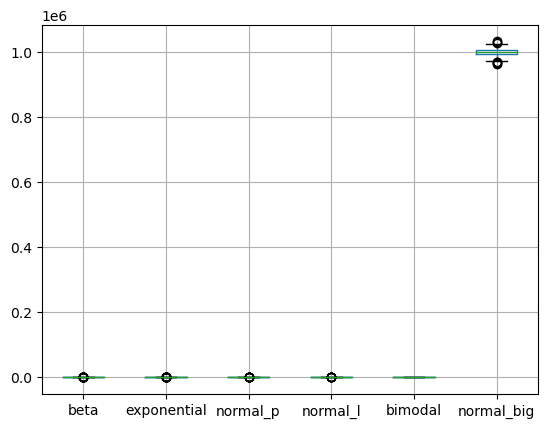

In [9]:
df.boxplot()

In [10]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [11]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [12]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.800663,0.921054,-0.585386,0.598600,1.051616,-1.056051
1,-0.428105,-0.777254,-0.131562,-0.226764,1.096410,-1.071584
2,0.671140,-0.418716,-0.198466,-0.704612,1.025394,-0.169918
3,0.635119,0.803421,-0.460664,0.541431,1.237113,-0.323214
4,0.568213,-0.724082,1.357537,0.526259,0.904672,-0.638756


<Axes: ylabel='Density'>

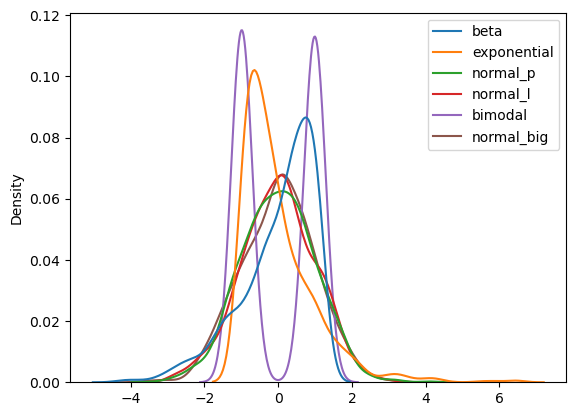

In [13]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [14]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.790923e-16,9.414691e-17,-2.060574e-16,1.865175e-17,-5.684342e-17,-5.326406e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.274802e+00,-1.015820e+00,-3.226490e+00,-2.884766e+00,-1.364642e+00,-3.616475e+00
25%,-5.018390e-01,-7.080231e-01,-6.840147e-01,-6.540690e-01,-9.859099e-01,-6.879346e-01
50%,2.628512e-01,-2.908888e-01,2.674962e-02,3.152137e-02,4.161546e-02,4.349332e-02
75%,7.773554e-01,4.255824e-01,6.644352e-01,6.656758e-01,9.860846e-01,6.684111e-01
max,1.185471e+00,6.446331e+00,4.091998e+00,3.011763e+00,1.402267e+00,3.300815e+00


<Axes: >

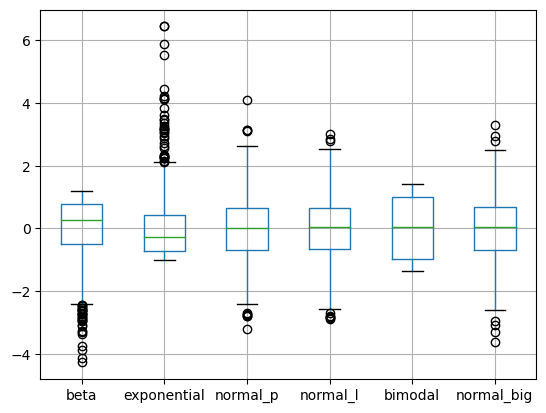

In [15]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()